In [2]:
from sklearn.model_selection import learning_curve
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Đọc dữ liệu từ các tệp CSV
data_fpt = pd.read_csv('FPT.csv')
data_msn = pd.read_csv('MSN.csv')
data_pnj = pd.read_csv('PNJ.csv')
data_vic = pd.read_csv('VIC.csv')

# Chuyển đổi cột Date/Time sang kiểu datetime
data_fpt['Date/Time'] = pd.to_datetime(data_fpt['Date/Time'])
data_msn['Date/Time'] = pd.to_datetime(data_msn['Date/Time'])
data_pnj['Date/Time'] = pd.to_datetime(data_pnj['Date/Time'])
data_vic['Date/Time'] = pd.to_datetime(data_vic['Date/Time'])

# Sắp xếp dữ liệu theo Date/Time
data_fpt.sort_values('Date/Time', inplace=True)
data_msn.sort_values('Date/Time', inplace=True)
data_pnj.sort_values('Date/Time', inplace=True)
data_vic.sort_values('Date/Time', inplace=True)

# Tạo cột biến động giá cổ phiếu
data_fpt['Price Change'] = data_fpt['Close'].diff().shift(-1)
data_msn['Price Change'] = data_msn['Close'].diff().shift(-1)
data_pnj['Price Change'] = data_pnj['Close'].diff().shift(-1)
data_vic['Price Change'] = data_vic['Close'].diff().shift(-1)

In [4]:
# Tách dữ liệu thành tập huấn luyện và kiểm tra
def prepare_data(data):
    data = data.dropna(subset=['Price Change'])
    X = data[['Open', 'High', 'Low', 'Close', 'Volume']]
    y = data['Price Change']
    return train_test_split(X, y, test_size=0.2, random_state=42)

X_train_fpt, X_test_fpt, y_train_fpt, y_test_fpt = prepare_data(data_fpt)
X_train_msn, X_test_msn, y_train_msn, y_test_msn = prepare_data(data_msn)
X_train_pnj, X_test_pnj, y_train_pnj, y_test_pnj = prepare_data(data_pnj)
X_train_vic, X_test_vic, y_train_vic, y_test_vic = prepare_data(data_vic)

In [5]:
# Định nghĩa tham số grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Hàm huấn luyện và đánh giá mô hình cho từng cổ phiếu
def train_and_evaluate(X_train, y_train, X_test, y_test, name):
    grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)

    mae, rmse, y_pred = evaluate_model(grid_search.best_estimator_, X_test, y_test)

    # In ra kết quả
    print(f"Random Forest - {name} (Best Params): {grid_search.best_params_}")
    print(f"Random Forest - {name}: MAE={mae}, RMSE={rmse}")

    # Vẽ biểu đồ Predicted vs Actual Values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Predicted vs Actual Values for {name}')
    plt.show()

    # Vẽ biểu đồ Feature Importance
    importances = grid_search.best_estimator_.feature_importances_
    feature_names = X_train.columns
    forest_importances = pd.Series(importances, index=feature_names)

    plt.figure(figsize=(10, 6))
    forest_importances.plot(kind='barh')
    plt.title(f'Feature Importances for {name}')
    plt.show()

# Đánh giá mô hình
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    return mae, rmse, y_pred

Fitting 3 folds for each of 108 candidates, totalling 324 fits


c:\Users\LEGION\OneDrive\Máy tính\finpros\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest - FPT (Best Params): {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest - FPT: MAE=0.03397222038614557, RMSE=0.06112316547395471


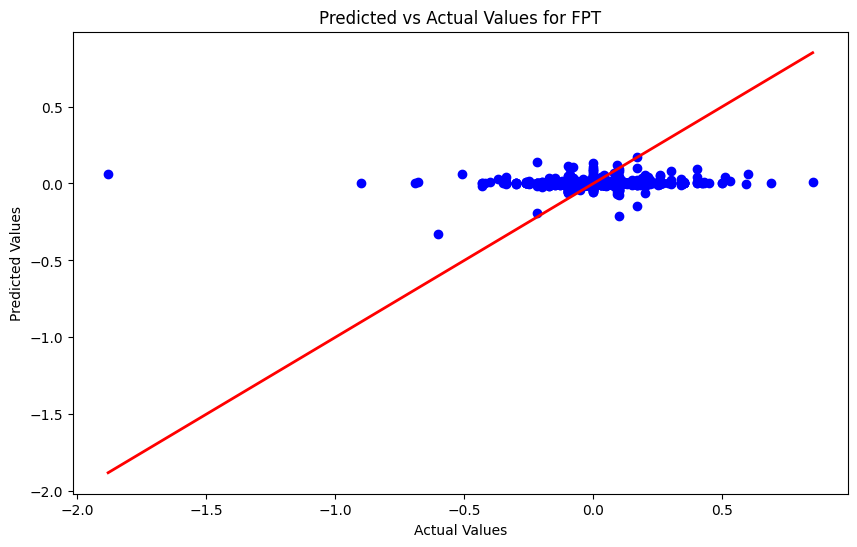

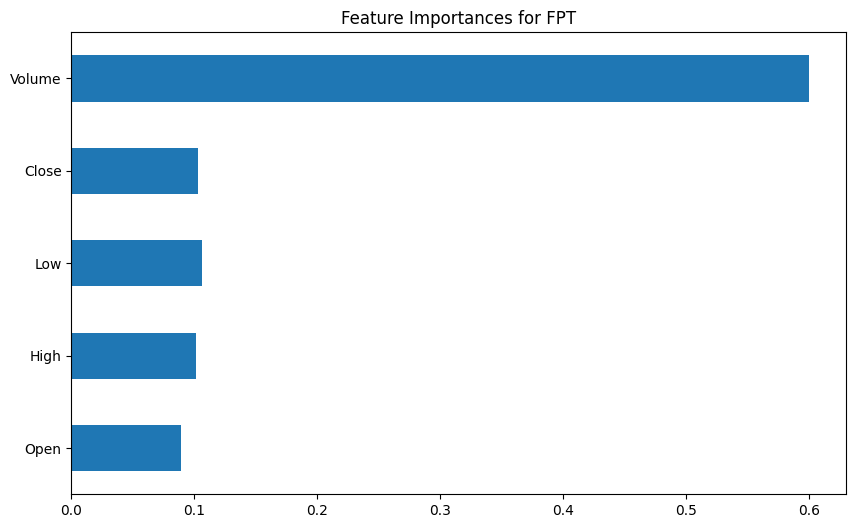

Fitting 3 folds for each of 108 candidates, totalling 324 fits


c:\Users\LEGION\OneDrive\Máy tính\finpros\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest - MSN (Best Params): {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest - MSN: MAE=0.10349397625261529, RMSE=0.20457190352779872


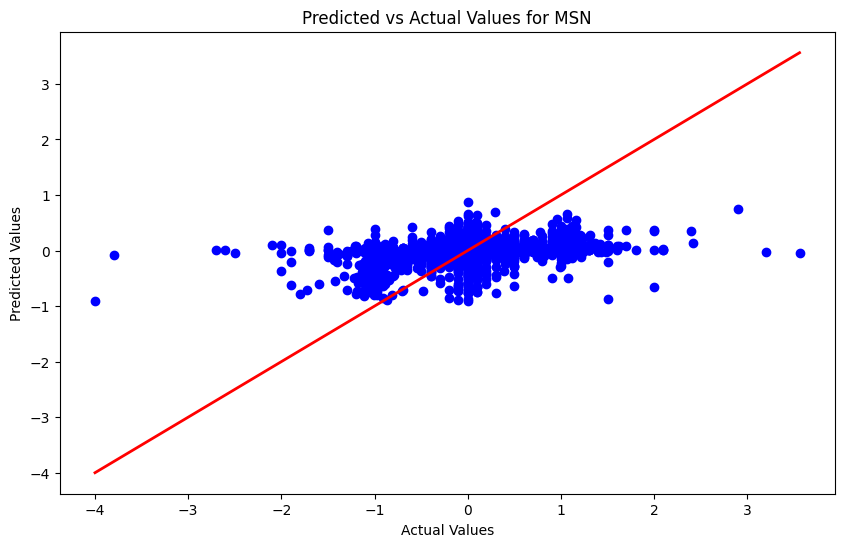

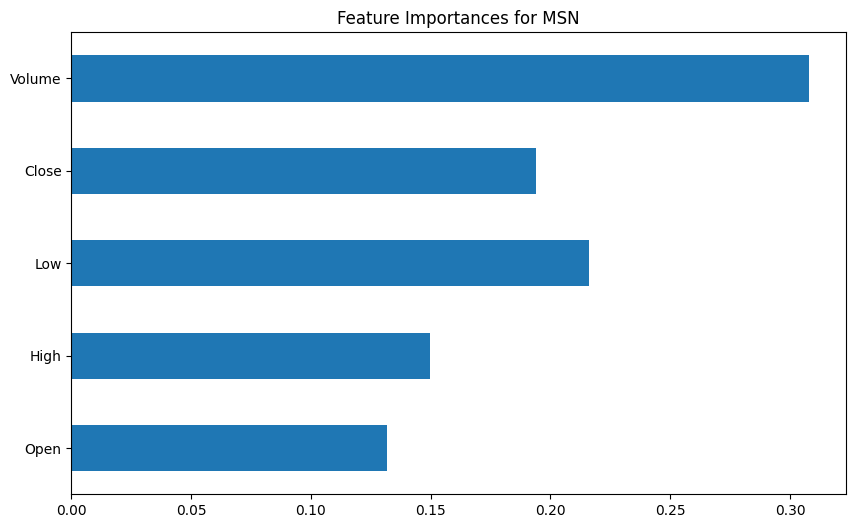

Fitting 3 folds for each of 108 candidates, totalling 324 fits


c:\Users\LEGION\OneDrive\Máy tính\finpros\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest - PNJ (Best Params): {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest - PNJ: MAE=0.3542603508263555, RMSE=0.5881346685262357


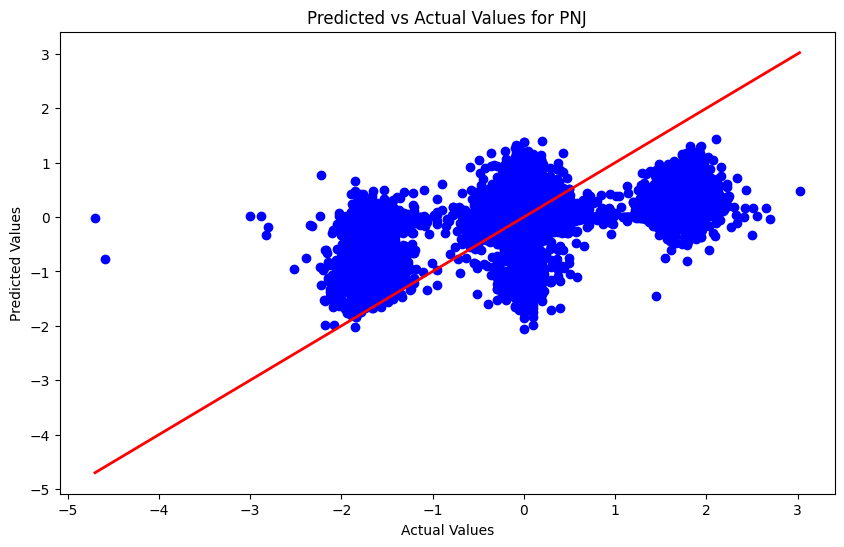

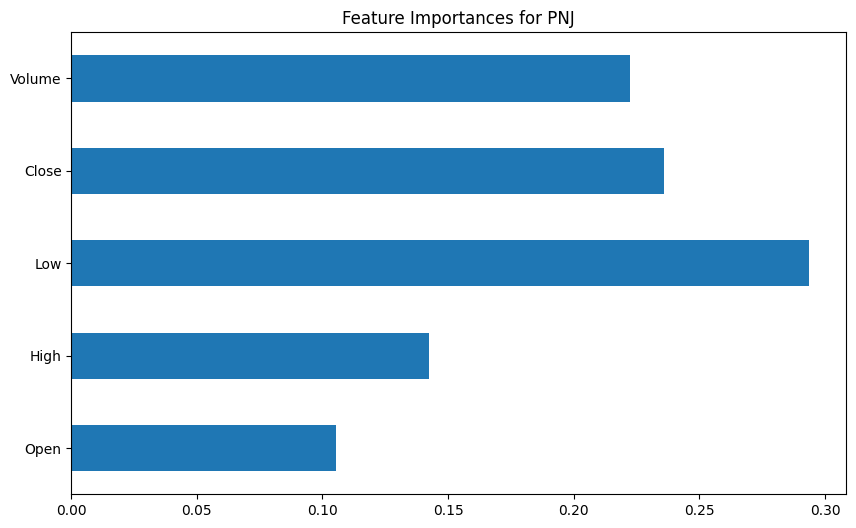

Fitting 3 folds for each of 108 candidates, totalling 324 fits


c:\Users\LEGION\OneDrive\Máy tính\finpros\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest - VIC (Best Params): {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest - VIC: MAE=0.09840561045281752, RMSE=0.18525765741809402


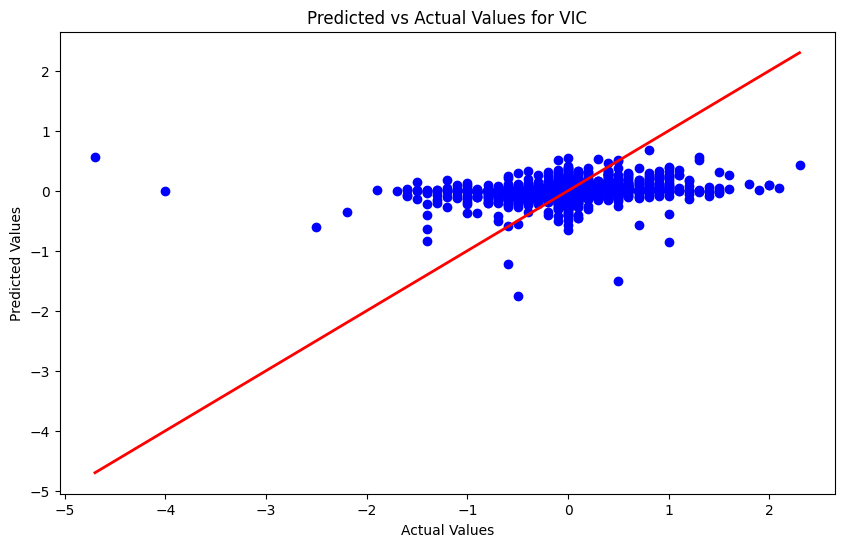

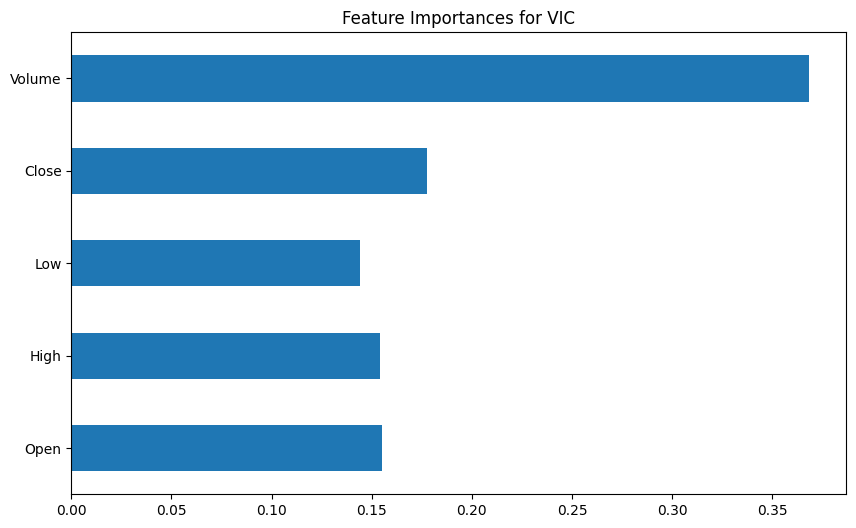

In [6]:
# Huấn luyện và đánh giá cho từng cổ phiếu
train_and_evaluate(X_train_fpt, y_train_fpt, X_test_fpt, y_test_fpt, 'FPT')
train_and_evaluate(X_train_msn, y_train_msn, X_test_msn, y_test_msn, 'MSN')
train_and_evaluate(X_train_pnj, y_train_pnj, X_test_pnj, y_test_pnj, 'PNJ')
train_and_evaluate(X_train_vic, y_train_vic, X_test_vic, y_test_vic, 'VIC')

In [7]:
# Tính toán các chỉ báo kỹ thuật
def calculate_indicators(data):
    data['MA_10'] = data['Close'].rolling(window=10).mean()
    data['MA_50'] = data['Close'].rolling(window=50).mean()
    
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    data['RSI'] = 100 - (100 / (1 + rs))
    
    exp12 = data['Close'].ewm(span=12, adjust=False).mean()
    exp26 = data['Close'].ewm(span=26, adjust=False).mean()
    data['MACD'] = exp12 - exp26
    
    data['Bollinger_High'] = data['Close'].rolling(window=20).mean() + 2 * data['Close'].rolling(window=20).std()
    data['Bollinger_Low'] = data['Close'].rolling(window=20).mean() - 2 * data['Close'].rolling(window=20).std()
    
    data.dropna(inplace=True)
    return data

data_fpt = calculate_indicators(data_fpt)
data_msn = calculate_indicators(data_msn)
data_pnj = calculate_indicators(data_pnj)
data_vic = calculate_indicators(data_vic)
def prepare_data(data):
    data = data.dropna(subset=['Price Change', 'MA_10', 'MA_50', 'RSI', 'MACD', 'Bollinger_High', 'Bollinger_Low'])
    X = data[['Open', 'High', 'Low','Close', 'Volume', 'MA_10', 'MA_50', 'RSI', 'MACD', 'Bollinger_High', 'Bollinger_Low']]
    y = data['Price Change']
    return train_test_split(X, y, test_size=0.2, random_state=42)

X_train_fpt, X_test_fpt, y_train_fpt, y_test_fpt = prepare_data(data_fpt)
X_train_msn, X_test_msn, y_train_msn, y_test_msn = prepare_data(data_msn)
X_train_pnj, X_test_pnj, y_train_pnj, y_test_pnj = prepare_data(data_pnj)
X_train_vic, X_test_vic, y_train_vic, y_test_vic = prepare_data(data_vic)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


c:\Users\LEGION\OneDrive\Máy tính\finpros\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest - FPT (Best Params): {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest - FPT: MAE=0.03685463765232019, RMSE=0.06264016857906617


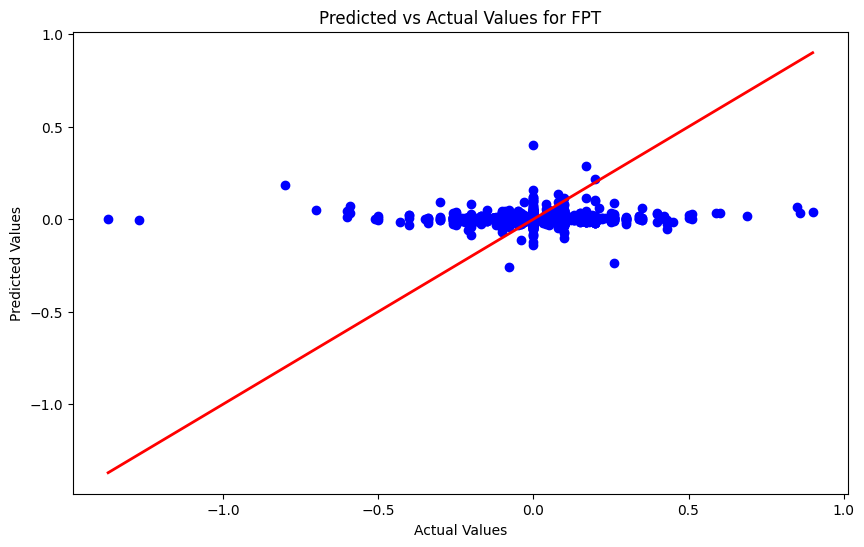

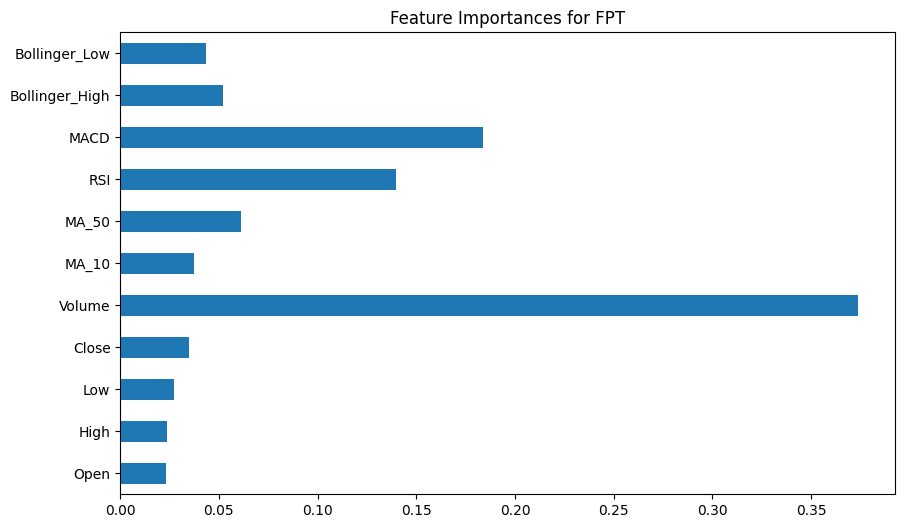

Fitting 3 folds for each of 108 candidates, totalling 324 fits


c:\Users\LEGION\OneDrive\Máy tính\finpros\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest - MSN (Best Params): {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest - MSN: MAE=0.10634160469292597, RMSE=0.2133986015887142


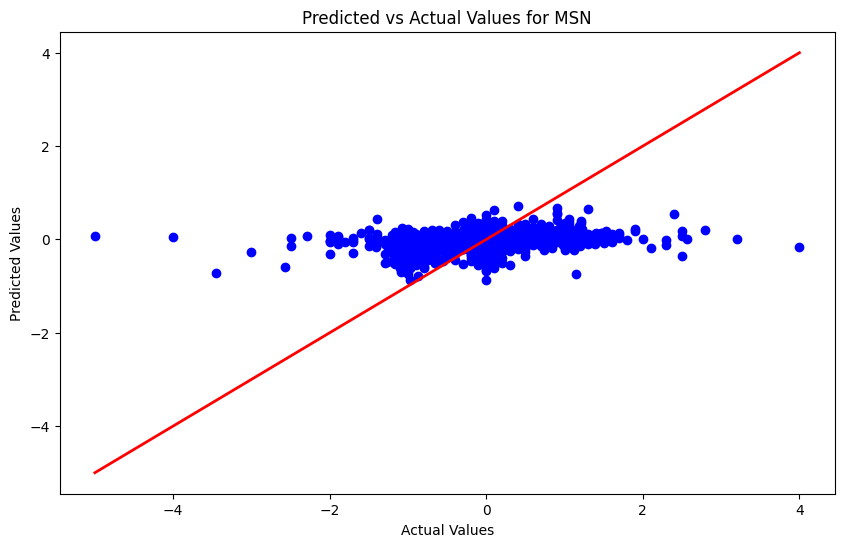

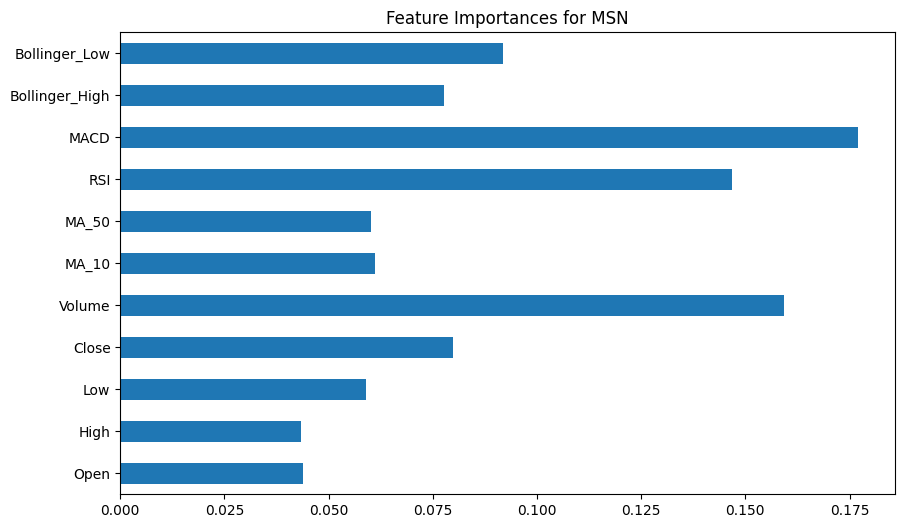

Fitting 3 folds for each of 108 candidates, totalling 324 fits


c:\Users\LEGION\OneDrive\Máy tính\finpros\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest - PNJ (Best Params): {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest - PNJ: MAE=0.3454570168757541, RMSE=0.5554584692634095


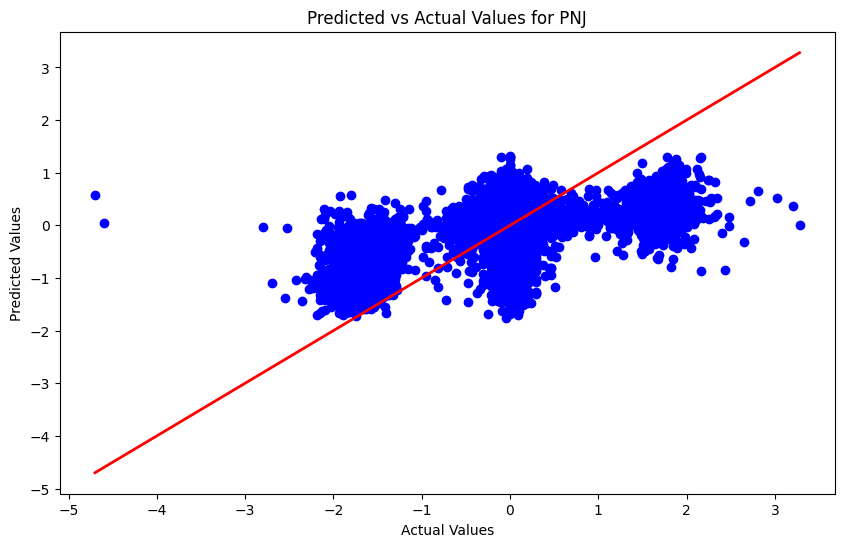

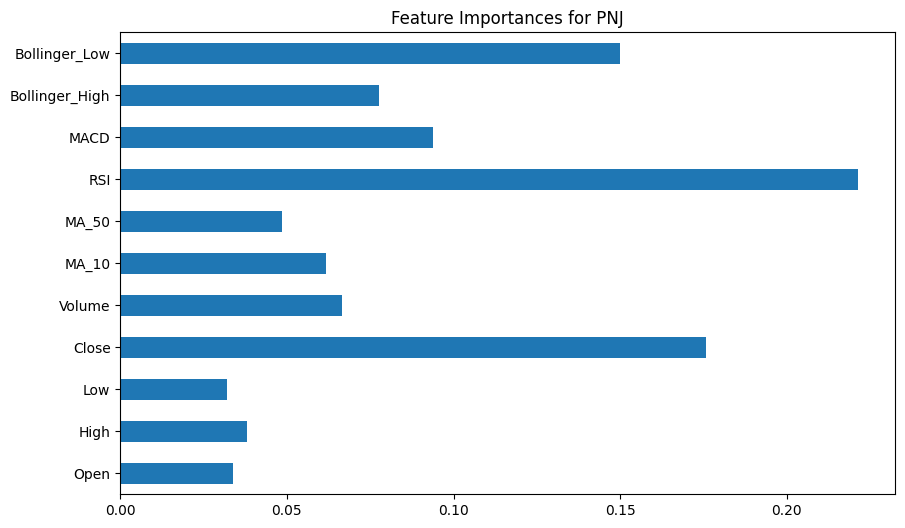

Fitting 3 folds for each of 108 candidates, totalling 324 fits


c:\Users\LEGION\OneDrive\Máy tính\finpros\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest - VIC (Best Params): {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest - VIC: MAE=0.10258062011376375, RMSE=0.19368245876232112


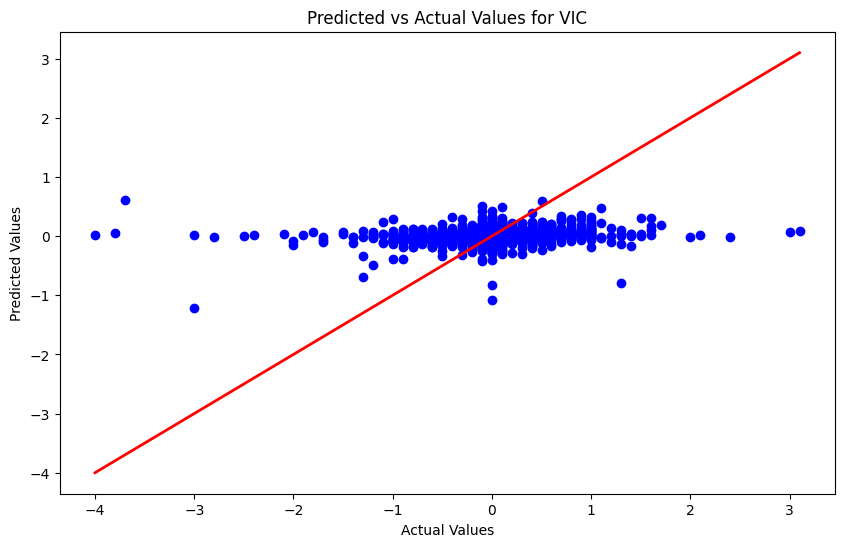

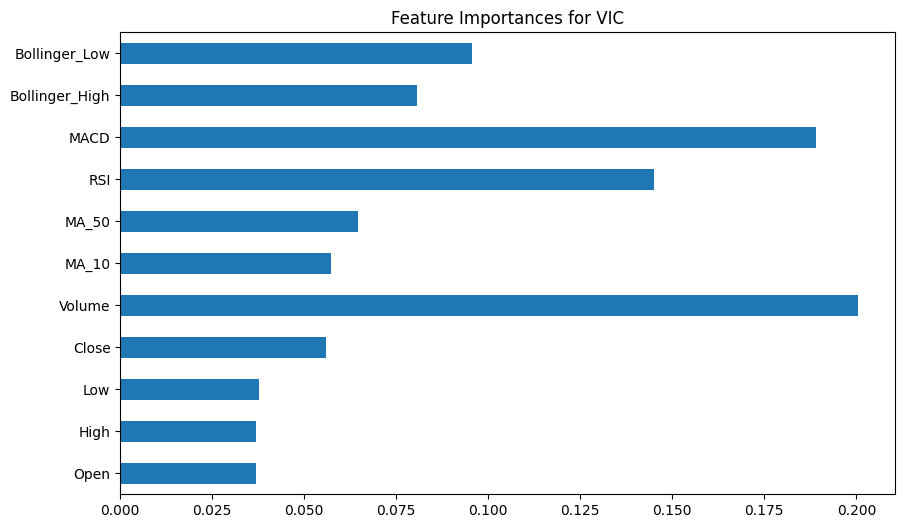

In [8]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Hàm huấn luyện và đánh giá mô hình cho từng cổ phiếu
def train_and_evaluate(X_train, y_train, X_test, y_test, name):
    grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)

    mae, rmse, y_pred = evaluate_model(grid_search.best_estimator_, X_test, y_test)

    # In ra kết quả
    print(f"Random Forest - {name} (Best Params): {grid_search.best_params_}")
    print(f"Random Forest - {name}: MAE={mae}, RMSE={rmse}")

    # Vẽ biểu đồ Predicted vs Actual Values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Predicted vs Actual Values for {name}')
    plt.show()

    # Vẽ biểu đồ Feature Importance
    importances = grid_search.best_estimator_.feature_importances_
    feature_names = X_train.columns
    forest_importances = pd.Series(importances, index=feature_names)

    plt.figure(figsize=(10, 6))
    forest_importances.plot(kind='barh')
    plt.title(f'Feature Importances for {name}')
    plt.show()

# Đánh giá mô hình
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    return mae, rmse, y_pred

# Huấn luyện và đánh giá cho từng cổ phiếu
train_and_evaluate(X_train_fpt, y_train_fpt, X_test_fpt, y_test_fpt, 'FPT')
train_and_evaluate(X_train_msn, y_train_msn, X_test_msn, y_test_msn, 'MSN')
train_and_evaluate(X_train_pnj, y_train_pnj, X_test_pnj, y_test_pnj, 'PNJ')
train_and_evaluate(X_train_vic, y_train_vic, X_test_vic, y_test_vic, 'VIC')

In [9]:
# loại bỏ một số tham só ít quan trọng
def prepare_data(data):
    data = data.dropna(subset=['Price Change', 'MA_10', 'MA_50', 'RSI', 'MACD', 'Bollinger_High', 'Bollinger_Low'])
    X = data[['Close', 'Volume', 'MA_10', 'MA_50', 'RSI', 'MACD', 'Bollinger_High', 'Bollinger_Low']]
    y = data['Price Change']
    return train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_model_plot(model, x_test, y_test,name):
    mae, rmse, y_pred = evaluate_model(model, x_test, y_test)

    # In ra kết quả
    print(f"Random Forest - {name}: MAE={mae}, RMSE={rmse}")

    # Vẽ biểu đồ Predicted vs Actual Values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Predicted vs Actual Values for {name}')
    plt.show()
X_train_fpt, X_test_fpt, y_train_fpt, y_test_fpt = prepare_data(data_fpt)
X_train_msn, X_test_msn, y_train_msn, y_test_msn = prepare_data(data_msn)
X_train_pnj, X_test_pnj, y_train_pnj, y_test_pnj = prepare_data(data_pnj)
X_train_vic, X_test_vic, y_train_vic, y_test_vic = prepare_data(data_vic)

Random Forest - fpt: MAE=0.03686102110895804, RMSE=0.06260531959573794


c:\Users\LEGION\OneDrive\Máy tính\finpros\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


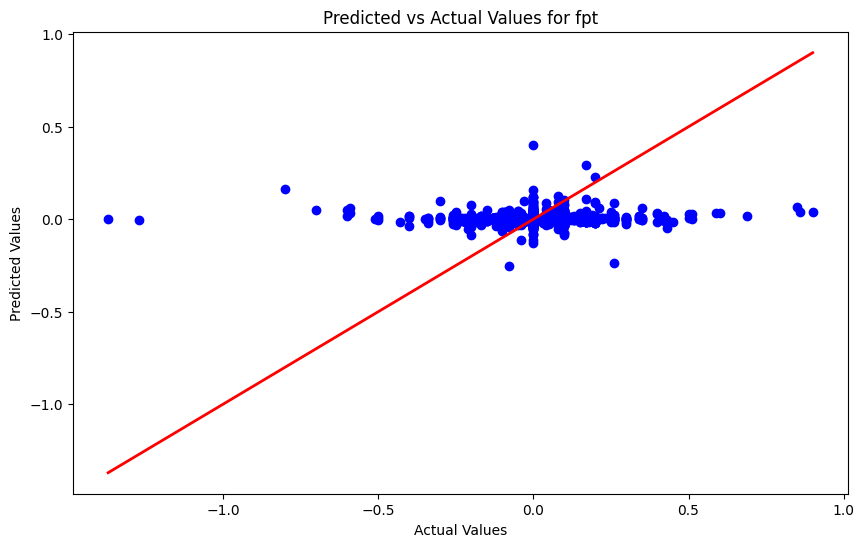

Random Forest - msn: MAE=0.10677168105963265, RMSE=0.2141744236979343


c:\Users\LEGION\OneDrive\Máy tính\finpros\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


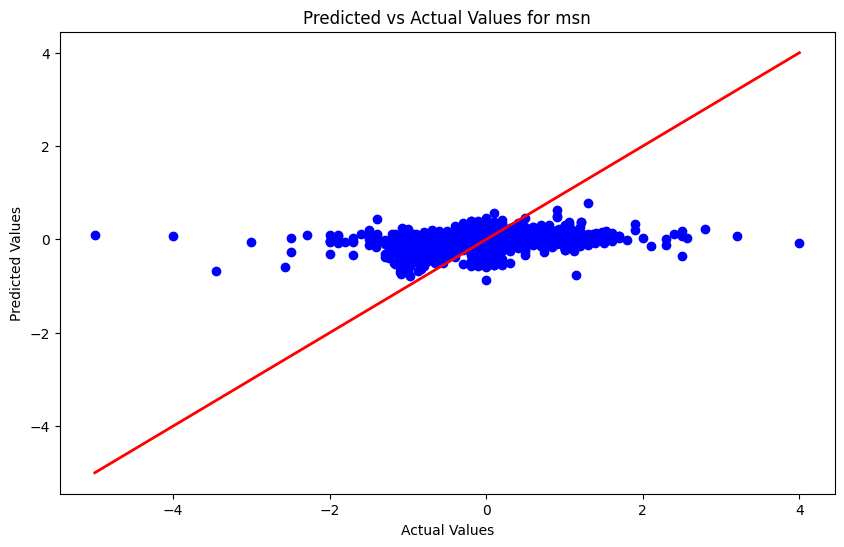

Random Forest - pnj: MAE=0.34618761678595467, RMSE=0.5565235302860625


c:\Users\LEGION\OneDrive\Máy tính\finpros\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


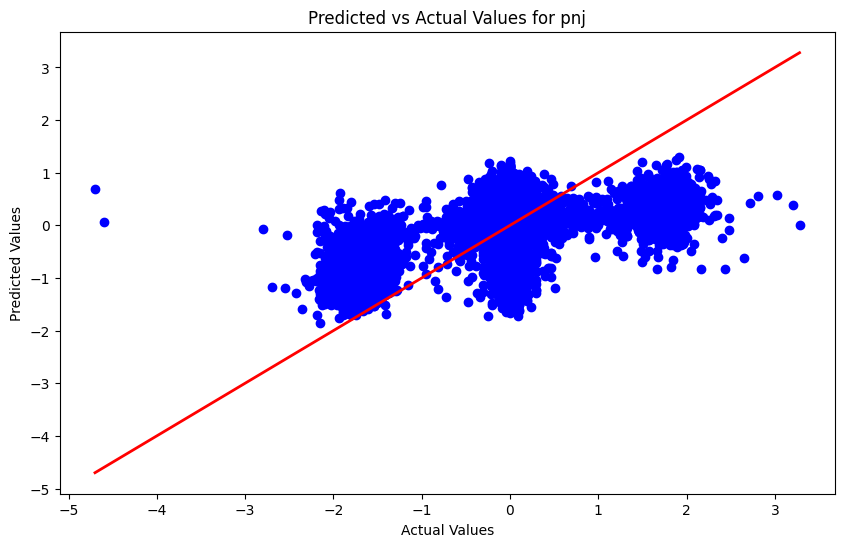

Random Forest - vic: MAE=0.1027031931624523, RMSE=0.1937773004088918


c:\Users\LEGION\OneDrive\Máy tính\finpros\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


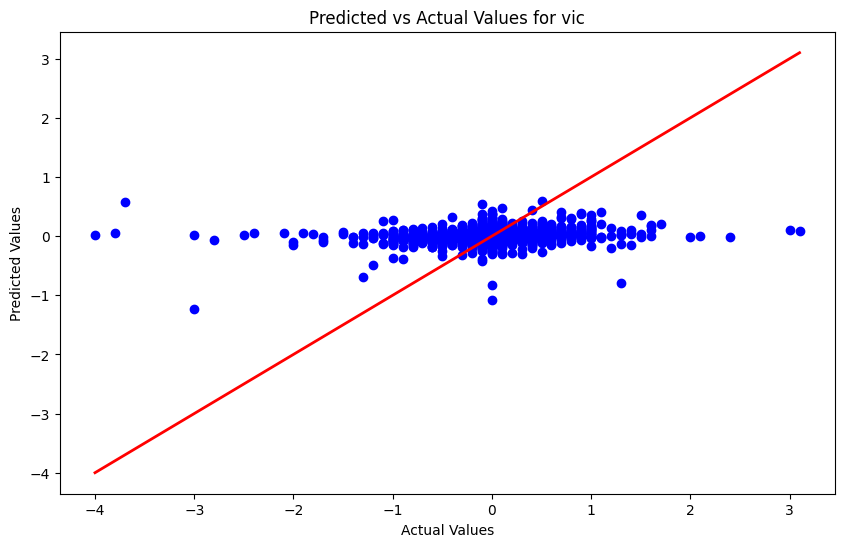

In [10]:
#Dựa vào việc tìm tham số tối ưu nhất để kiểm tra lại
rf_model_fpt = RandomForestRegressor(
    max_depth=10,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)
rf_model_fpt.fit(X_train_fpt,y_train_fpt)

rf_model_msn = RandomForestRegressor(
    max_depth=30,
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=200,
    random_state=42
)
rf_model_msn.fit(X_train_msn,y_train_msn)

rf_model_pnj = RandomForestRegressor(
    max_depth=30,
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=200,
    random_state=42
)
rf_model_pnj.fit(X_train_pnj,y_train_pnj)

rf_model_vic = RandomForestRegressor(
    max_depth=20,
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=200,
    random_state=42
)
rf_model_vic.fit(X_train_vic,y_train_vic)



evaluate_model_plot(rf_model_fpt, X_test_fpt, y_test_fpt, 'fpt')
evaluate_model_plot(rf_model_msn, X_test_msn, y_test_msn, 'msn')
evaluate_model_plot(rf_model_pnj, X_test_pnj, y_test_pnj, 'pnj')
evaluate_model_plot(rf_model_vic, X_test_vic, y_test_vic, 'vic')